# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from scipy.ndimage import gaussian_filter1d

In [2]:
df = pd.read_csv("joined_data.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,room_type_Shared room,number_of_places_2500m,number_of_places_1000m,number_of_places_500m,number_of_rats_2500m,number_of_rats_1000m,number_of_rats_500m,number_of_trees_2500m,number_of_trees_1000m,number_of_trees_500m
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,0.0,8,0,0,456,57,8,5491,1037,321
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,0.0,75,29,4,448,54,5,3611,296,46


The first thing we do is to plot a heatmap to get an idea if there are any clear relationships between features we should explore later, we are especially interested in the price. From this we see that it might be interesting to explore ``price`` vs ``longtitude``,``calculated_host_listings_count``, ``availability_365``, ``neighbourhood_other_lable`` and the tourist-places-features. 

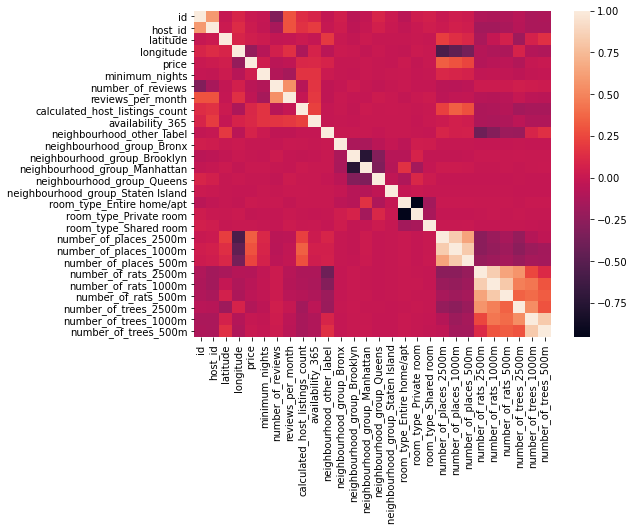

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())
plt.show()

First, we plot the price against some relevant features that were included in the main, original Airbnb dataset, which are indicated in the x-label of each of the following figures.

## Plots using price

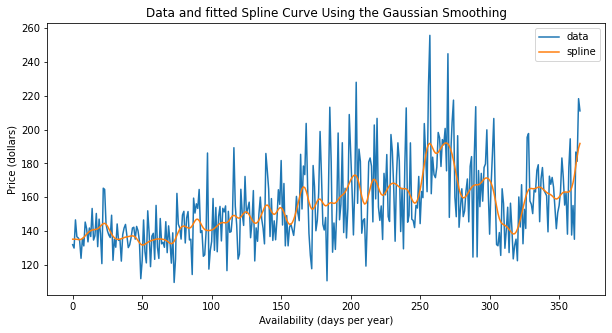

In [75]:
plot_data = df.groupby(['availability_365',]).mean().loc[:,'price']

x = plot_data.index
y = plot_data.values
y_smoothed = gaussian_filter1d(y, sigma=3)

plt.figure(figsize=(10,5))
plt.plot(plot_data, label = 'data')
plt.plot(x, y_smoothed, label = 'spline')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Availability (days per year)")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

This plot shows that the mean price per night of a condo increases with the amount of days per year that it is available, going from 140 when the availability is small to more than 180 when it is greater than 250.

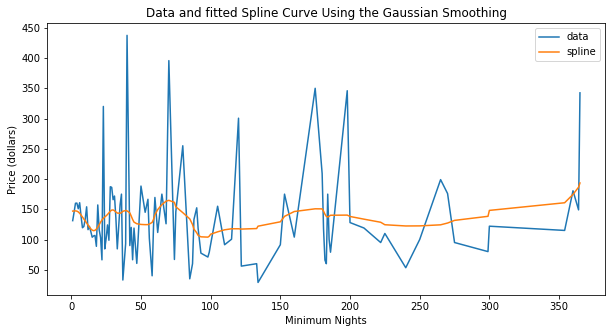

In [76]:
plot_data = df.groupby(['minimum_nights',]).mean().loc[:,'price']

x = plot_data.index
y = plot_data.values
y_smoothed = gaussian_filter1d(y, sigma=3)

plt.figure(figsize=(10,5))
plt.plot(plot_data, label = 'data')
plt.plot(x, y_smoothed, label = 'spline')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Minimum Nights")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

This plot shows that there might be a small tendency to increase the price as the minimum renting period increases.

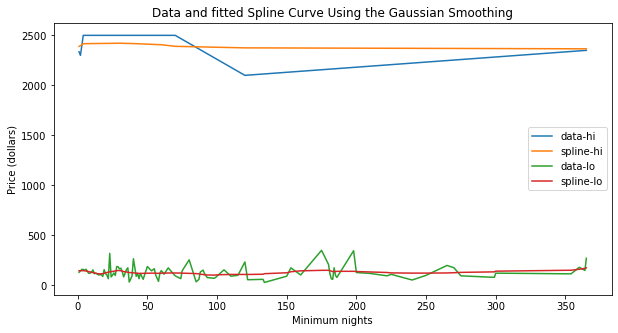

In [77]:
thres = 2000
df_hi = df[df.price > thres]
df_lo = df[df.price <= thres]

plot_data_hi = df_hi.groupby(['minimum_nights',]).mean().loc[:,'price']
plot_data_lo = df_lo.groupby(['minimum_nights',]).mean().loc[:,'price']

x_hi = plot_data_hi.index
y_hi = plot_data_hi.values
y_smoothed_hi = gaussian_filter1d(y_hi, sigma=3)

x_lo = plot_data_lo.index
y_lo = plot_data_lo.values
y_smoothed_lo = gaussian_filter1d(y_lo, sigma=3)

plt.figure(figsize=(10,5))
plt.plot(plot_data_hi, label = 'data-hi')
plt.plot(x_hi, y_smoothed_hi, label = 'spline-hi')
plt.plot(plot_data_lo, label = 'data-lo')
plt.plot(x_lo, y_smoothed_lo, label = 'spline-lo')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Minimum nights")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

However, when the listings are split by its price (in this case, a threshold of 2000 dollars is established), we see that there is no apparent or strong relation between these two variables. 

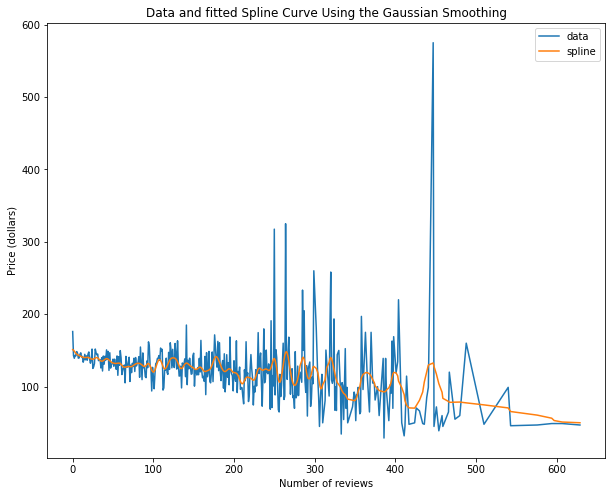

In [97]:
plot_data = df.groupby(['number_of_reviews',]).mean().loc[:,'price']

x = plot_data.index
y = plot_data.values
y_smoothed = gaussian_filter1d(y, sigma=3)

plt.figure(figsize=(10,8))
plt.plot(plot_data, label = 'data')
plt.plot(x, y_smoothed, label = 'spline')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Number of reviews")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

In this other plot, it can be observed that the price is generally lower for condos with higher number of reviews. The explanation behind this might be that lower prices are more affordable, and therefore rented out more times, which automatically translates in receiving a larger number of reviews.

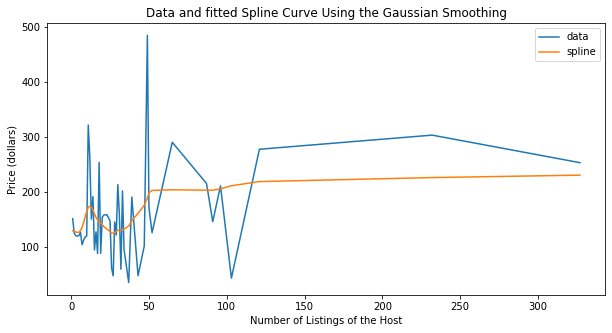

In [98]:
plot_data = df.groupby(['calculated_host_listings_count',]).mean().loc[:,'price']

x = plot_data.index
y = plot_data.values
y_smoothed = gaussian_filter1d(y, sigma=3)

plt.figure(figsize=(10,5))
plt.plot(plot_data, label = 'data')
plt.plot(x, y_smoothed, label = 'spline')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Number of Listings of the Host")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

Price is relatively constant for the different number of listings of a host with more than 50 listings. However, the price of listings where the host has less than 50 listings, seem to be notacibly less.

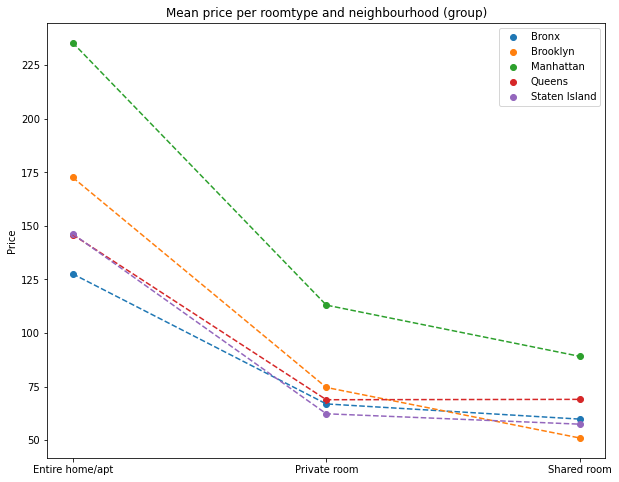

In [80]:
plot_data = df.groupby(['neighbourhood_group','room_type',]).mean().loc[:,'price']

plt.figure(figsize=(10,8))
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Bronx'], label = 'Bronx')
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Brooklyn'], label = 'Brooklyn')
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Manhattan'], label = 'Manhattan')
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Queens'], label = 'Queens')
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Staten Island'], label = 'Staten Island')
plt.plot(plot_data.loc['Bronx'], linestyle='dashed')
plt.plot(plot_data.loc['Brooklyn'], linestyle='dashed')
plt.plot(plot_data.loc['Manhattan'], linestyle='dashed')
plt.plot(plot_data.loc['Queens'], linestyle='dashed')
plt.plot(plot_data.loc['Staten Island'], linestyle='dashed')
plt.title("Mean price per roomtype and neighbourhood (group)")
plt.legend()
plt.ylabel("Price")
plt.show()

This is just a depiction of the mean price of each type of room in the different boroughs of NYC. As one would expect, prices for all kinds of rooms are much more expensive in Manhattan than in any other borough, and renting an entire appartment is more expensive than just a room.

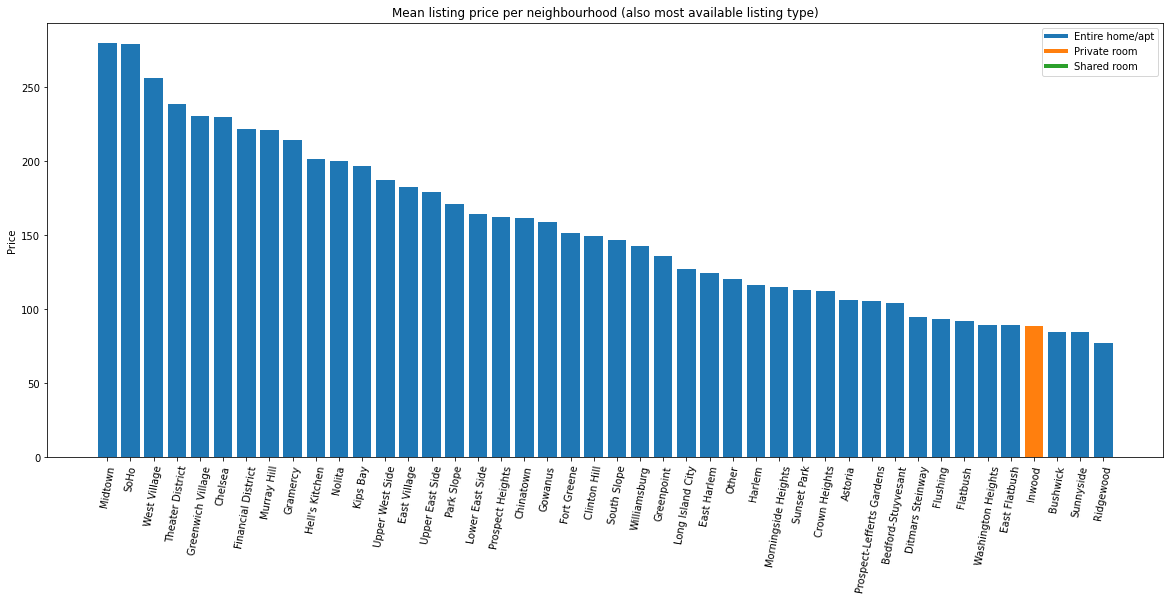

In [81]:
plot_data = df.groupby(['neighbourhood_other',]).mean().loc[:,'price'].sort_values(ascending = False)

plot_data_color = df.groupby(['neighbourhood_other',]).mean()[['room_type_Entire home/apt', 'room_type_Shared room', 'room_type_Private room']]
color = []
for x in plot_data_color.values:
  color.append(np.argmax(x))
plot_data_color['color'] = color

plot_data = pd.DataFrame(plot_data).merge(plot_data_color, left_index = True, right_index = True)

col = {0: '#1f77b4', 1: '#2ca02c', 2: '#ff7f0e'}

plt.figure(figsize=(20,8))
plt.bar(plot_data.index, height = plot_data.price, color = (plot_data.color.map(col)))
plt.title("Mean listing price per neighbourhood (also most available listing type)")
plt.ylabel("Price")
plt.xticks(rotation=80)

legend_elements = [Line2D([0], [0], color=col[0], lw=4, label='Entire home/apt'),
                   Line2D([0], [0], color=col[2], lw=4, label='Private room'),
                   Line2D([0], [0], color=col[1], lw=4, label='Shared room')]

plt.legend(handles=legend_elements,)
plt.show()

Finaly this plot shows how large the difference in the mean price is between neighbourhoods. It also shows how in almost all neighbourhoods there are more listings with the ``room_type`` "Entire home/apt" than the two other options.

From the plots shown above, just three were choosen for the website: "Price vs availability", "Mean price per roomtype and neighbourhood(group)" and "Mean price per neighbourhood".

## Trees, Rats and Turist Places

This part shows the data exploration that we did on the three additional datasets. However, non of theese plots ended up being used for the website.

In [82]:
df_trees = pd.read_csv("data_trees/trees_data_clean.csv")
df_trees.head(2)

,spc_common,diameter_cm,latitude,longitude
0,green ash,38.10,40.774001,-73.748105
1,littleleaf linden,5.08,40.572681,-74.119011


Initial plots to have broad overlook of the trees dataset
(double-click to zoom in).

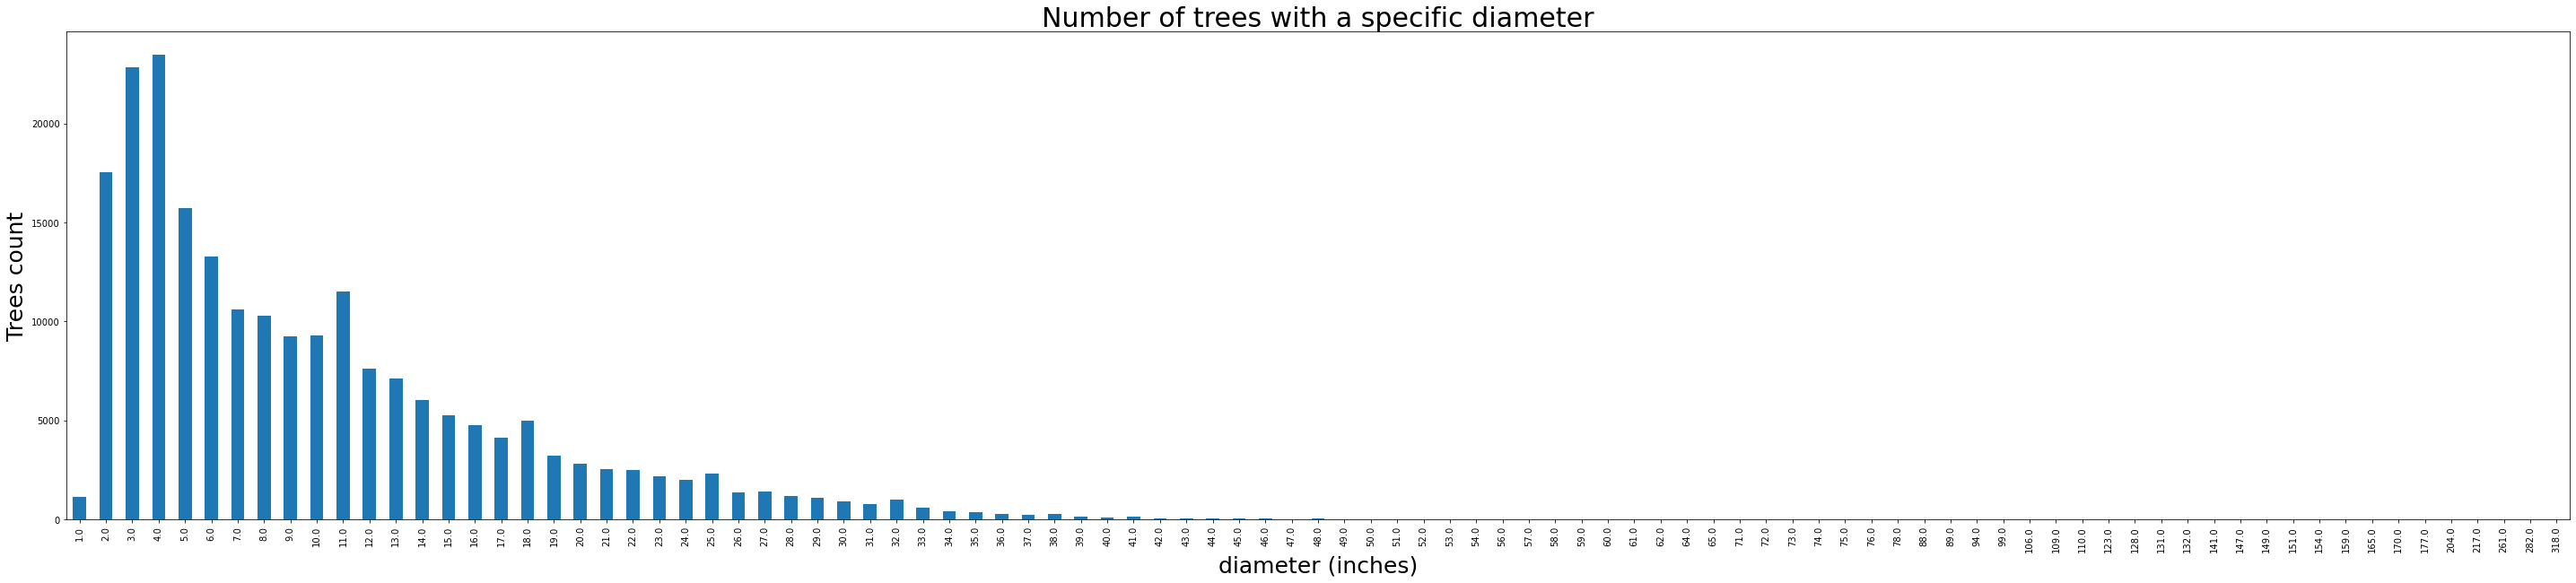

In [105]:
plt.figure(figsize=(50,10))
round((df_trees.diameter_cm/2.54)).value_counts().sort_index().plot.bar()
plt.title("Number of trees with a specific diameter", size =30)
plt.xlabel("diameter (inches)", size = 25)
plt.ylabel("Trees count", size = 25)
plt.show()

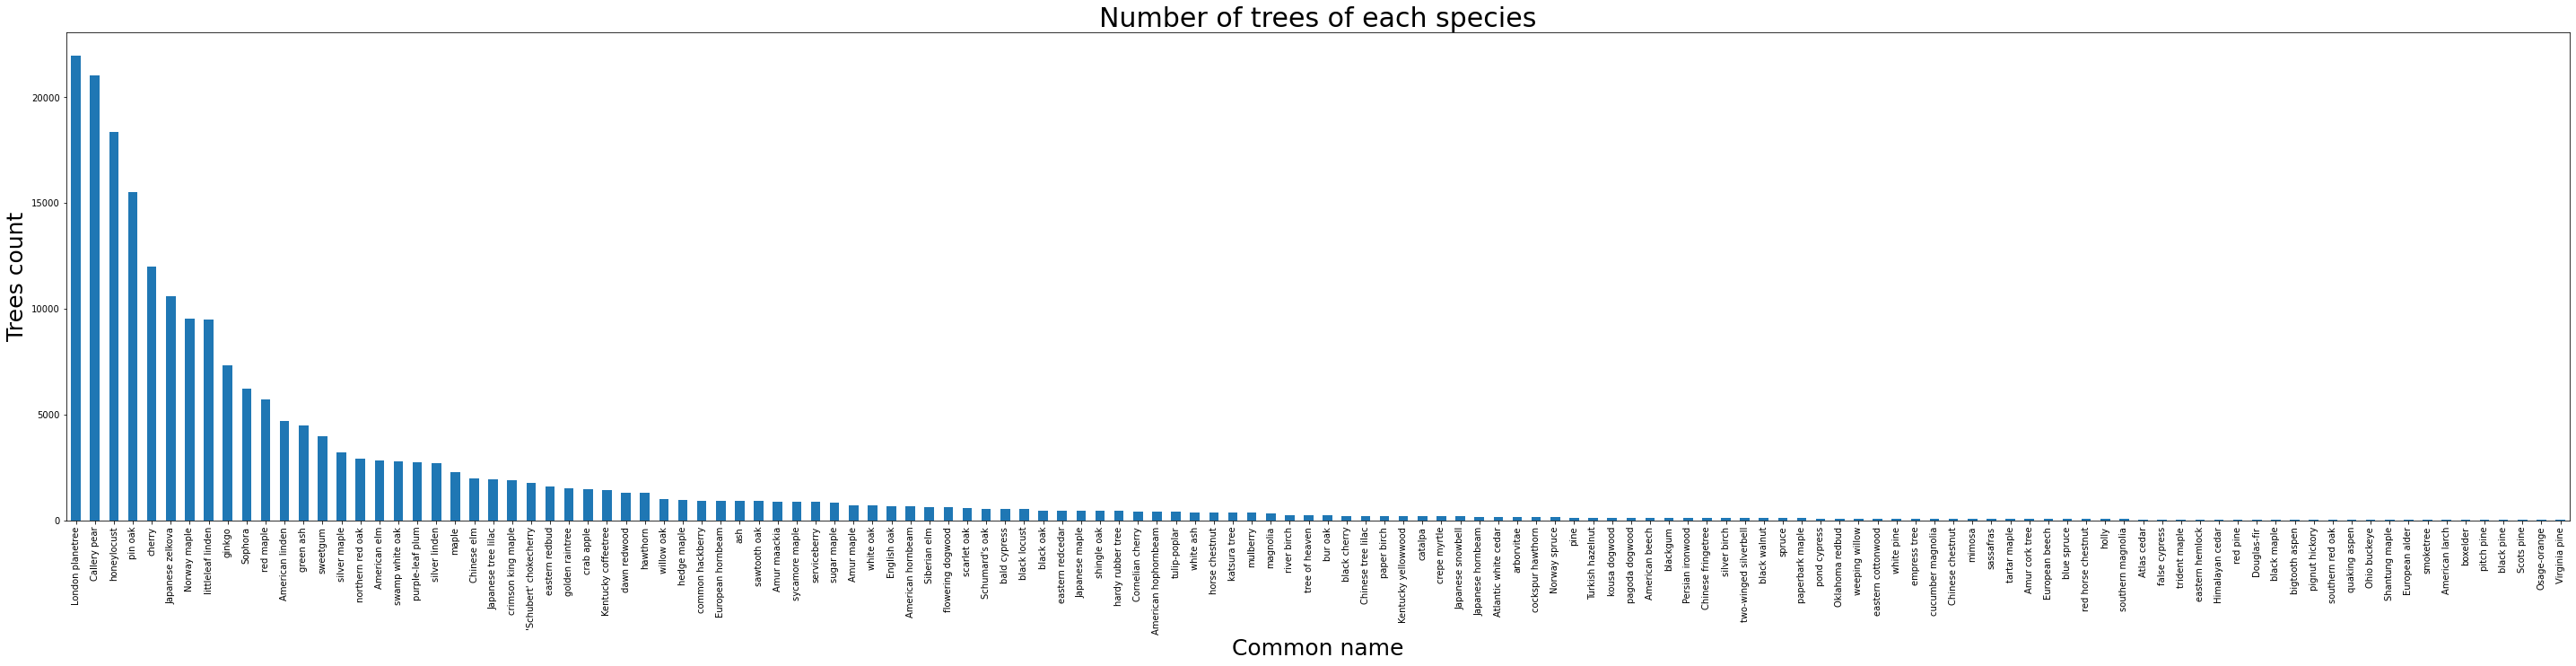

In [106]:
plt.figure(figsize=(50,10))
df_trees.spc_common.value_counts().plot.bar()
plt.title("Number of trees of each species", size =30)
plt.xlabel("Common name", size = 25)
plt.ylabel("Trees count", size = 25)
plt.show()

In [85]:
df_rats = pd.read_csv("data_rats/rats_data_clean.csv")
df_rats.head(2)

,latitude,longitude,Location Type
0,40.68123,-73.97288,3+ Family Apt. Building
1,40.68123,-73.97288,3+ Family Apt. Building


Plot to explore the distribution of rat sightings per ``Location Type``.

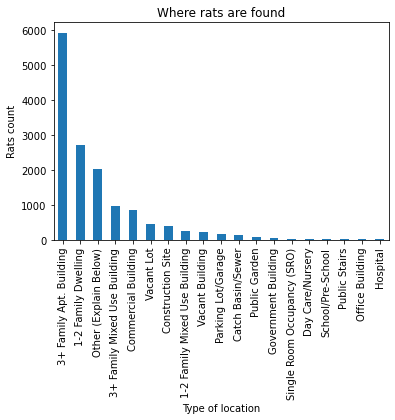

In [100]:
df_rats['Location Type'].value_counts().plot.bar()
plt.title("Where rats are found")
plt.xlabel("Type of location")
plt.ylabel("Rats count")
plt.show()

In [87]:
df_places = pd.read_csv("data_places/places_data_clean.csv")
df_places.head(2)

,Tourist_Spot,Address,Zipcode,location,latitude,longitude
0,9/11 Memorial & Museum,rld Trade Center (museum: 180 Greenwich St.) M...,10007,"National September 11 Memorial & Museum, 180, ...",40.711304,-74.013283
1,Abyssinian Baptist Church,132 Odell Clark Place New York,10030,"Abyssinian Baptist Church, 132, Odell M Clarke...",40.816636,-73.941478


Plot to visualize distribution of tourist places per ``Zipcode``.

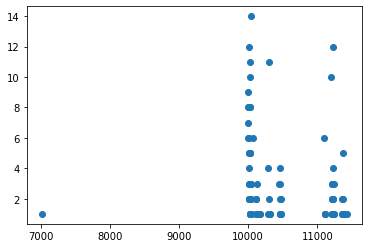

In [88]:
data = df_places['Zipcode'].value_counts().sort_index()
plt.scatter(x = data.index, y = data.values)
plt.show()

## Plots with Price and additioal features (Trees, Rats and Turistic Places)

With the extra information that was obtained from the trees, rats and touristic places dataset, further explanation for the price of a condo can be searched. In this section, the external data that was added to the main dataset is presented and the influence of it on the prices of the Airbnb condos will be investigated.

First of all, data is grouped in a convenient way. More precisely, the average number of trees/rats/tourist places in radii of 500, 1000 and 2500m are calculated for each borough. The following cell shows the data that we are working on, and the next one shows the grouped data as it was described in the previous sentence.

(It must be said that the following analysis was done with other grouping criteria, e.g., for each room type instead of for each borough, although they did not generate any significant or meaningful results and were discarded from this notebook. For this same reason, we will only be working with the information obtained for radii of 2.5 kilometers)

In [89]:
df_join = pd.read_csv("joined_data.csv")
display(df_join.head(2))
df_join.shape

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,room_type_Shared room,number_of_places_2500m,number_of_places_1000m,number_of_places_500m,number_of_rats_2500m,number_of_rats_1000m,number_of_rats_500m,number_of_trees_2500m,number_of_trees_1000m,number_of_trees_500m
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,...,0.0,8,0,0,456,57,8,5491,1037,321
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,...,0.0,75,29,4,448,54,5,3611,296,46


(48713, 36)

In [90]:
y_borough = df_join.groupby(['neighbourhood_group']).mean()[['number_of_places_2500m','number_of_places_1000m','number_of_places_500m','number_of_rats_2500m','number_of_rats_1000m','number_of_rats_500m','number_of_trees_2500m','number_of_trees_1000m','number_of_trees_500m', 'price']].sort_values(by = ['neighbourhood_group'])

y_borough['number_of_places_2500m'] = y_borough['number_of_places_2500m']/sum(y_borough['number_of_places_2500m'])*100
y_borough['number_of_places_1000m'] = y_borough['number_of_places_1000m']/sum(y_borough['number_of_places_1000m'])*100
y_borough['number_of_places_500m'] = y_borough['number_of_places_500m']/sum(y_borough['number_of_places_500m'])*100
y_borough['number_of_rats_2500m'] = y_borough['number_of_rats_2500m']/sum(y_borough['number_of_rats_2500m'])*100
y_borough['number_of_rats_1000m'] = y_borough['number_of_rats_1000m']/sum(y_borough['number_of_rats_1000m'])*100
y_borough['number_of_rats_500m'] = y_borough['number_of_rats_500m']/sum(y_borough['number_of_rats_500m'])*100
y_borough['number_of_trees_2500m'] = y_borough['number_of_trees_2500m']/sum(y_borough['number_of_trees_2500m'])*100
y_borough['number_of_trees_1000m'] = y_borough['number_of_trees_1000m']/sum(y_borough['number_of_trees_1000m'])*100
y_borough['number_of_trees_500m'] = y_borough['number_of_trees_500m']/sum(y_borough['number_of_trees_500m'])*100
y_borough.price = y_borough.price /sum(y_borough.price)*100
display(y_borough)

,number_of_places_2500m,number_of_places_1000m,number_of_places_500m,number_of_rats_2500m,number_of_rats_1000m,number_of_rats_500m,number_of_trees_2500m,number_of_trees_1000m,number_of_trees_500m,price
neighbourhood_group,,,,,,,,,,
Bronx,6.263503,4.933092,4.247560,22.658626,19.889549,19.727633,20.985741,19.095456,18.854983,14.732135
Brooklyn,10.101810,8.190711,8.224027,39.080683,37.468044,35.691383,22.590235,21.136086,20.570972,20.312718
Manhattan,73.028196,72.570949,71.910080,25.538091,29.509376,32.160629,20.105484,22.169370,22.899070,31.473122
Queens,3.901940,3.234420,3.477671,9.402149,8.880746,8.597219,18.603117,17.638076,17.451489,16.375260
Staten Island,6.704552,11.070828,12.140663,3.320450,4.252285,3.823135,17.715423,19.961012,20.223487,17.106765


In [91]:
bins_trees = np.arange(0, 8400, 300)
bins_rats = np.arange(0, 1800, 60)
bins_places = np.arange(0, 100, 2.5)

colors_dict = {'trees':'#79D151','rats':'#656D76','places':'#F29D0A'} #Old rat: #C0C0C0
bins_dict = {'rats':bins_rats, 'trees':bins_trees, 'places':bins_places}
features_dict = {'rats':'number_of_rats_2500m', 'trees':'number_of_trees_2500m', 'places':'number_of_places_2500m'}

n = sorted(df_join.neighbourhood_group.unique().tolist())

The next block of code computes the distributions of Airbnb listings in function of the amount of trees/rats/tourist places within a radius of 2.5km that surround them in each borough and illustrates them in an histogram.

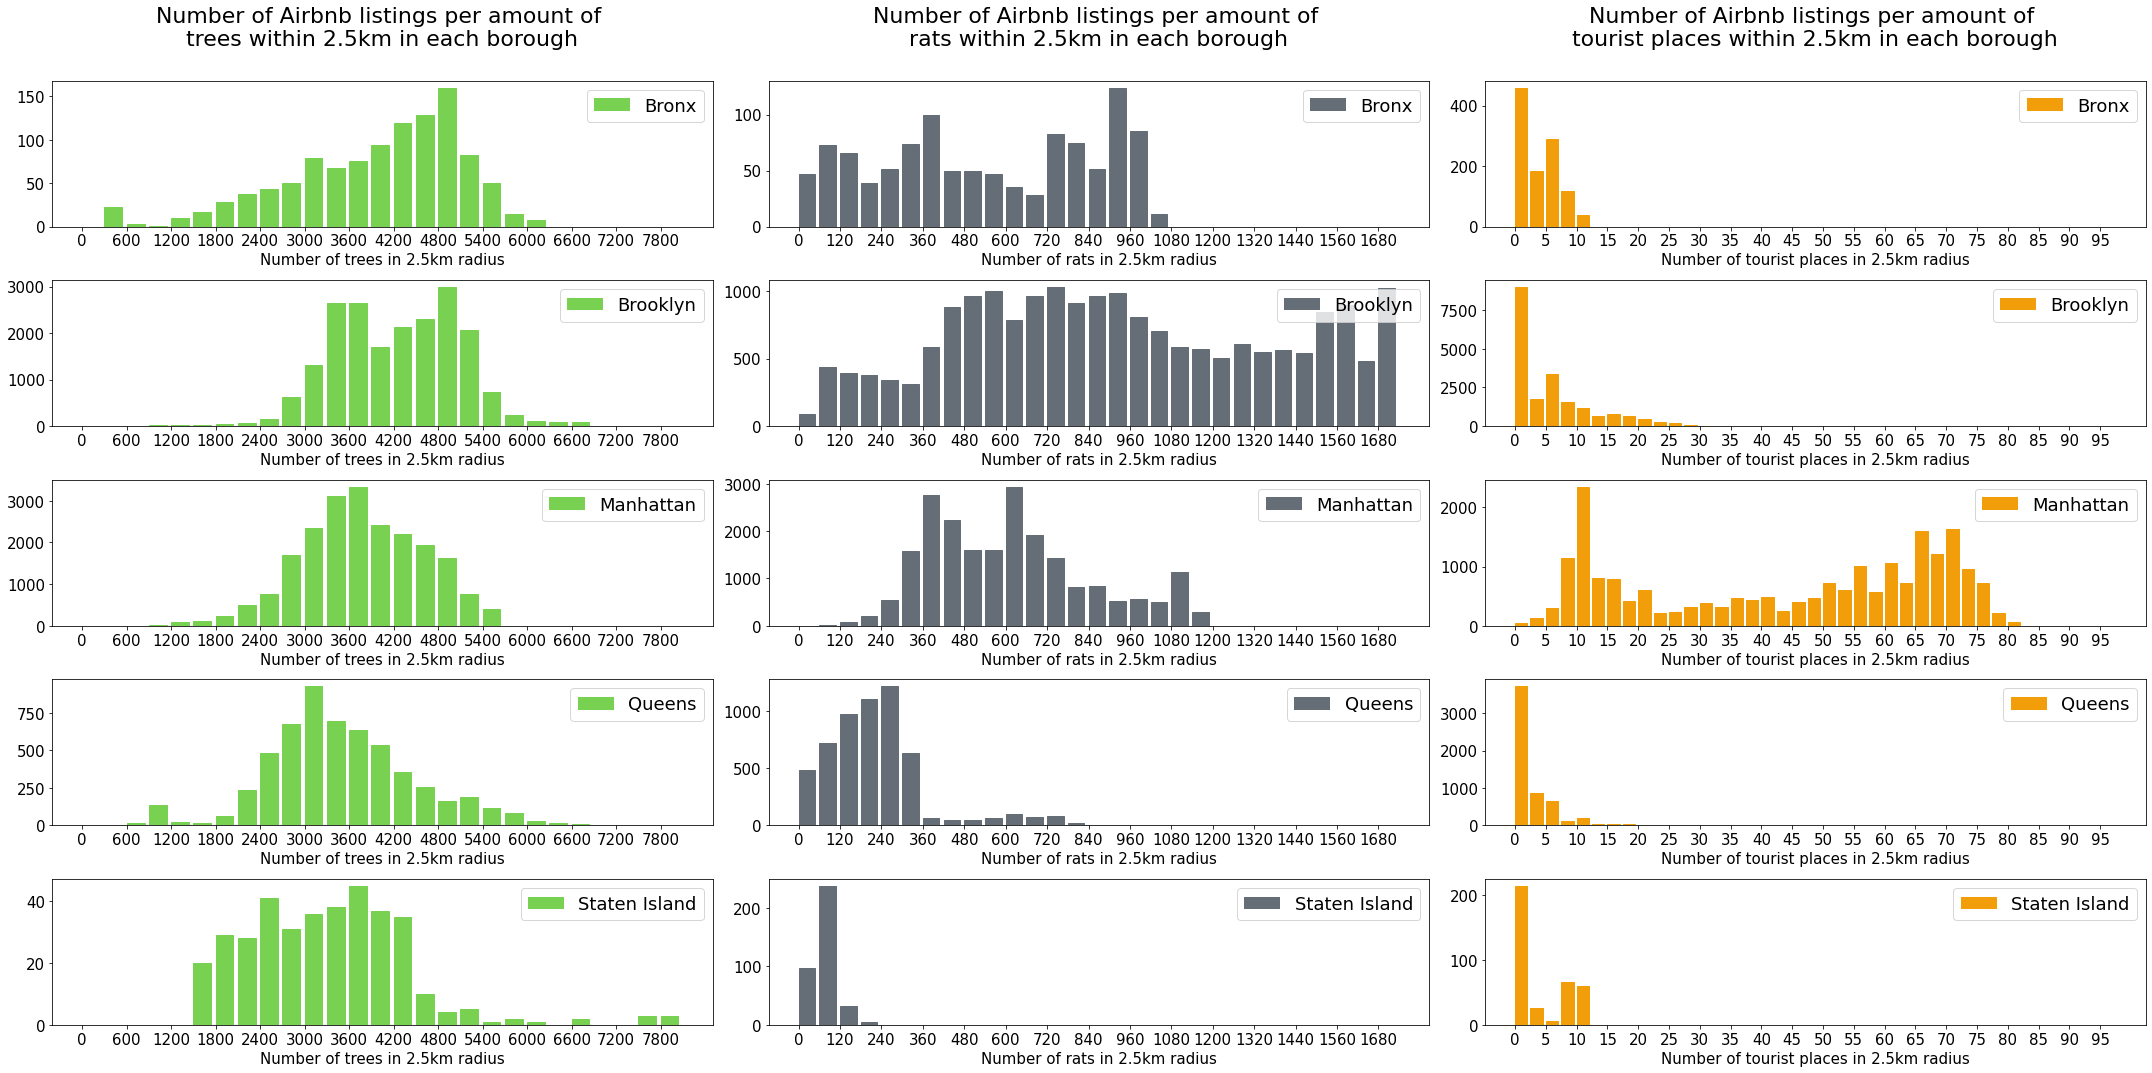

In [109]:
fig, ax = plt.subplots(len(y_borough),3, sharex=False, sharey=False)
fig.set_size_inches(30,(len(n)*3))

for idx,i in enumerate(y_borough.index):
    for idx_2,elem in enumerate(['trees', 'rats', 'tourist places']):
        ax[idx,idx_2].set_xlabel('Number of ' + elem + ' in 2.5km radius', size= 15, y = 0.9)
        if idx == 0:
            ax[idx,idx_2].set_title('Number of Airbnb listings per amount of \n' + elem + ' within 2.5km in each borough', size=22,y=1.2)
    
keys = colors_dict.keys()
for idx, key in enumerate(keys):
    color = colors_dict.get(key)
    bins = bins_dict.get(key)
    feature = features_dict.get(key)
    for i in range(len(n)):
        p = df_join[df_join.neighbourhood_group == n[i]][feature].reset_index(drop=True)
        ax[i,idx].hist(p, label = n[i], color = color, bins=bins)
        ax[i,idx].legend(loc="upper right", prop={'size': 18})
        ax[i,idx].set_xticks(bins[::2])
        ax[i,idx].set_xticklabels(map(int, bins[::2]), rotation=0, size = 15)
        ax[i,idx].yaxis.set_tick_params(labelsize=15)
        
        for rect in ax[i,idx].patches:
            rect.set_color(color)
            rect.set_width(rect.get_width()*0.8)
            
fig.tight_layout()
plt.savefig('../assets/img_slide6.png')

These histograms evidence that the number of trees, rats sightings and tourist places in each of the neighbourhood varies considerably. However, the distribution of the listings remains very similar in the case of the number of trees and touristic places (with the exception of Manhattan). A more detailed observation is done on the webpage.

For the last plot, the average price of the Airbnb listings in function of the amount of trees/rats/tourist places within a radius of 2.5km that surround them in each borough. The data is again plotted as an histogram, but since it may be difficult to interpret, a gaussian smoothing spline is also provided.

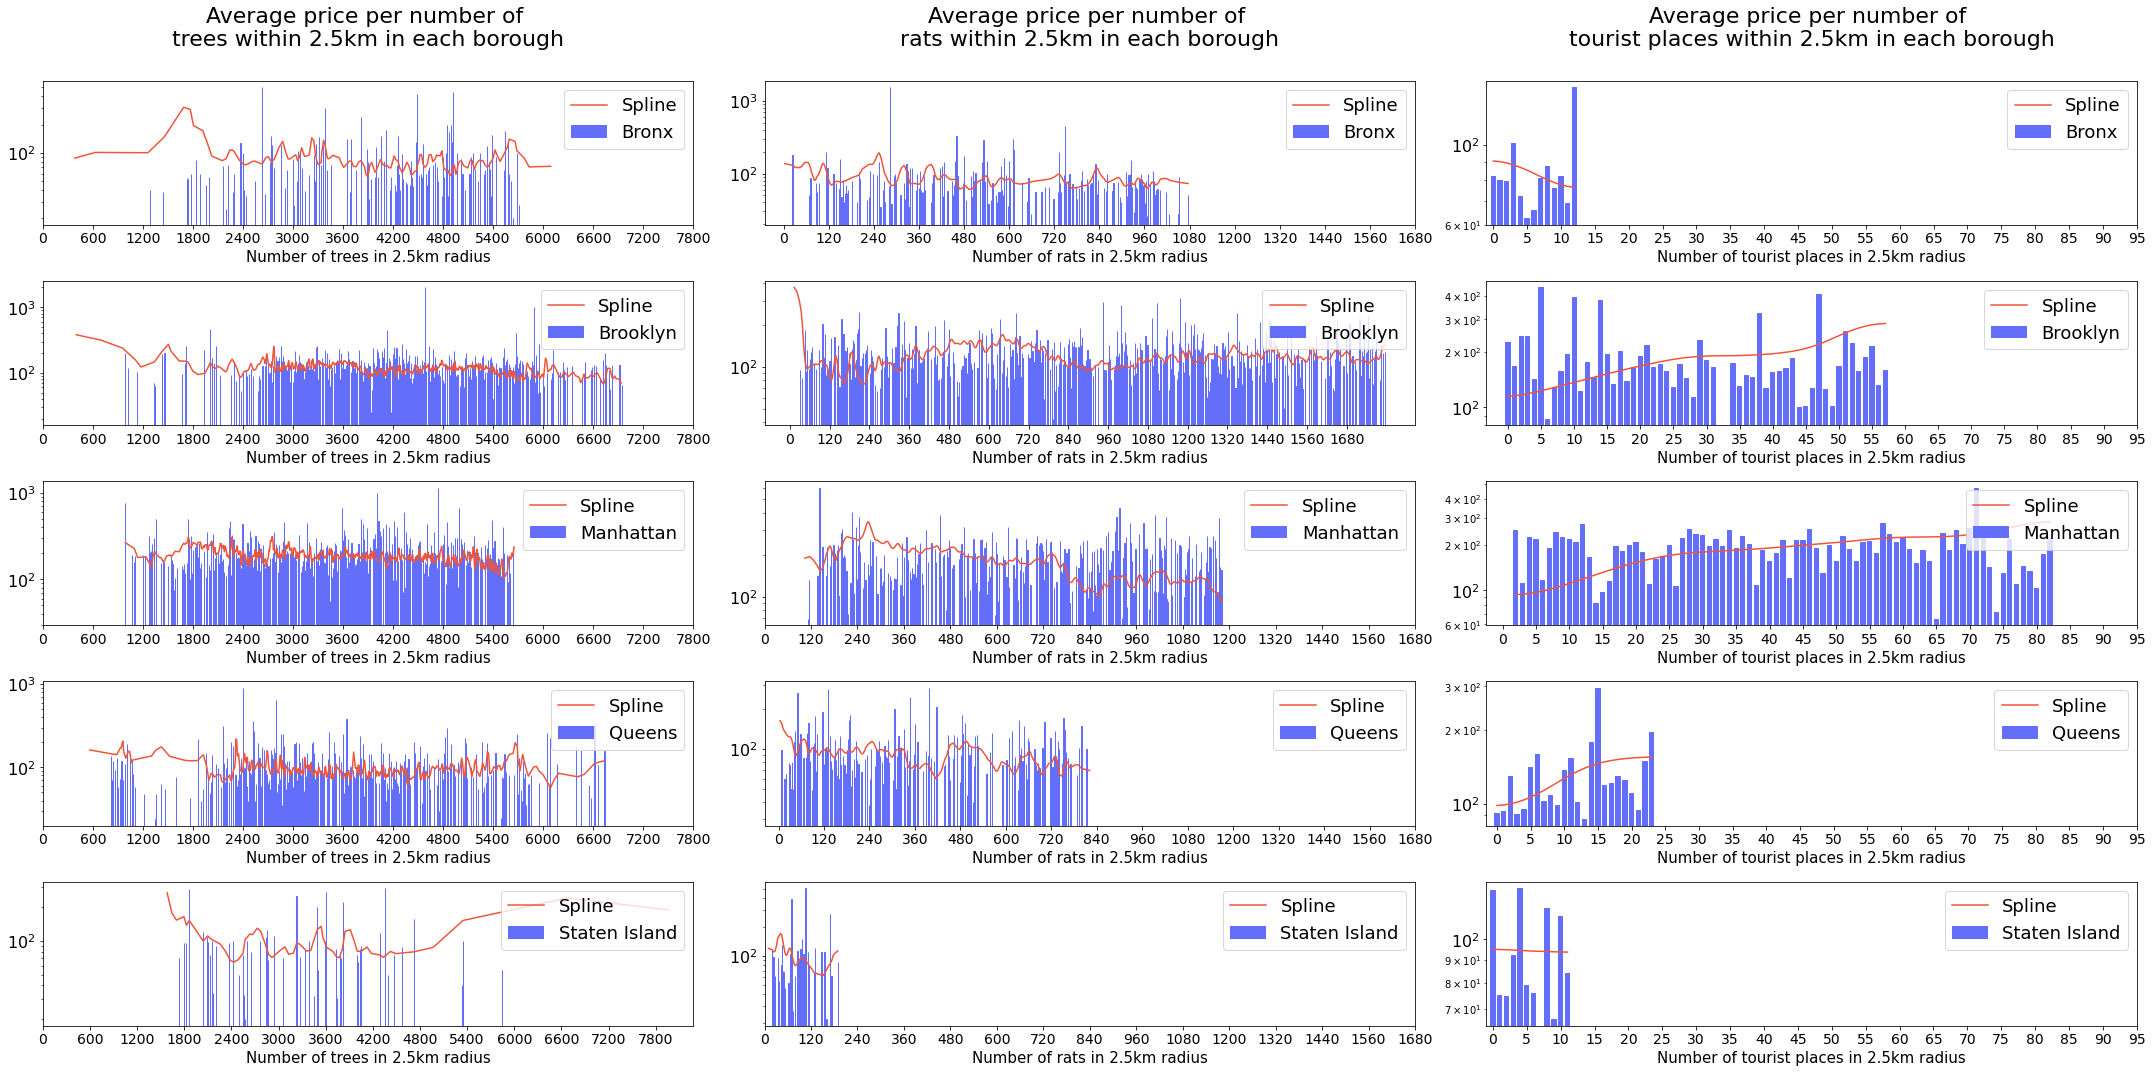

In [110]:
fig, ax = plt.subplots(len(y_borough),3)
fig.set_size_inches(30,(len(n)*3))

for idx,i in enumerate(y_borough.index):
    for idx_2,elem in enumerate(['trees', 'rats', 'tourist places']):
        ax[idx,idx_2].set_xlabel('Number of ' + elem + ' in 2.5km radius', size=15, y =0.5)
        if idx == 0:
            ax[idx,idx_2].set_title('Average price per number of \n' + elem + ' within 2.5km in each borough', size = 22, y = 1.2)
downsampling = [6,3,1]
for idx, key in enumerate(keys):
    bins = bins_dict.get(key)
    feature = features_dict.get(key)
    x = df_join.groupby(['neighbourhood_group',feature]).mean()[['price']].sort_values(by = ['neighbourhood_group', feature])
    for i in range(len(n)):
        p = x.loc[n[i],:].reset_index()
        y_smoothed = gaussian_filter1d(p.price, sigma=5)
        ax[i,idx].bar(p[feature].sample(frac=1/downsampling[idx]), p.price.sample(frac=1/downsampling[idx]), label = n[i], color = '#636efa')
        ax[i,idx].plot(p[feature][::downsampling[idx]], y_smoothed[::downsampling[idx]], label='Spline', color = '#ef553b')
        ax[i,idx].set_yscale('log')
        ax[i,idx].legend(loc="upper right",prop={'size': 18})
        ax[i,idx].set_xticks(bins[::2])
        ax[i,idx].set_xticklabels(map(int, bins[::2]), rotation=0, size = 14)
        ax[i,idx].yaxis.set_tick_params(labelsize=16)
        for rect in ax[i,idx].patches:
            rect.set_color('#636efa')
            rect.set_width(rect.get_width()*0.8)        
        
fig.tight_layout()
plt.savefig('../assets/img_slide7.png')

These histograms show that the number of trees do not necessarily influence the finaly price of a condo in any of the boroughs of New York. However, it can be observed how prices slightly decrease as the number of rats sightings around a location increases. In a stronger and opposite way, the last column of histograms show that the price of a condo increases with the number of touristic places that surround it.